# Data

## Reading the data

In [1]:
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
pass

# Reading train file data
Q1_train = pd.read_csv('Q1_train.csv')
y = Q1_train.to_numpy()[:,0]
x = Q1_train.to_numpy()[:,1:]/256

# Reading test file data
Q1_test  = pd.read_csv('Q1_test.csv')
y_test   = Q1_test.to_numpy()[:,0]
x_test   = Q1_test.to_numpy()[:,1:]/256

print(x.shape, y.shape, x_test.shape, y_test.shape)

Instructions for updating:
non-resource variables are not supported in the long term
(27455, 784) (27455,) (7172, 784) (7172,)


## Plotting some samples

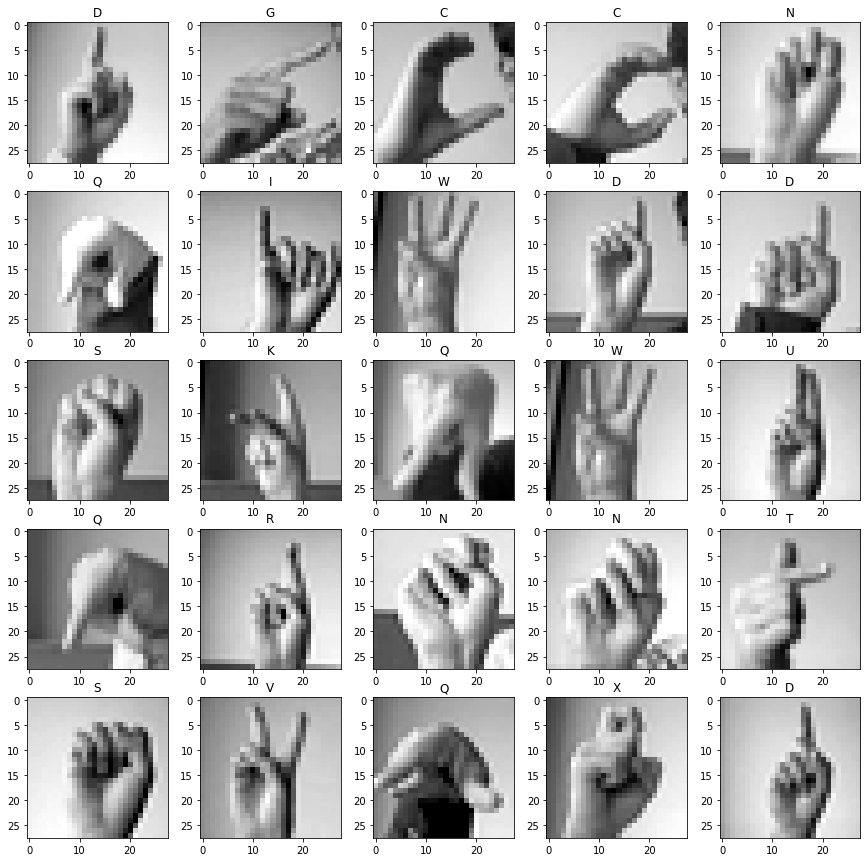

In [2]:
import matplotlib.pyplot as plt

ref = dict()
for i in range(26):
    ref[i] = chr(i+65)

fig, ax = plt.subplots(5,5,figsize=(15,15))

for i in range(5):
    for j in range(5):
        ax[i,j].imshow(np.reshape(x[5*i+j],(28,28)),cmap='gray')
        ax[i,j].set_title(ref[y[5*i+j]])

# Trining MLP

## Spliting and one-hotting

In [3]:
from sklearn.model_selection import train_test_split

# Splitting train-valid datasets
ratio = 0.2
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=ratio, shuffle=True, random_state=0)

# Making one-hot labels
n_classes = 25
with tf.Session() as sess:
    y_train_hot = sess.run(tf.one_hot(y_train, n_classes))
    y_valid_hot = sess.run(tf.one_hot(y_valid, n_classes))
    y_test_hot  = sess.run(tf.one_hot(y_test , n_classes))

print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_train:\t{}'.format(x_valid.shape))
print('y_valid:\t{}'.format(y_valid.shape))

x_train:	(21964, 784)
y_train:	(21964,)
x_train:	(5491, 784)
y_valid:	(5491,)


## Examining class labels

In [30]:
for i in range(np.max(y_train)+1):
    print (f'Samples for class {ref[i]}: {len(np.where(y_train==i)[0])}')

Samples for class A: 896
Samples for class B: 810
Samples for class C: 922
Samples for class D: 935
Samples for class E: 762
Samples for class F: 966
Samples for class G: 850
Samples for class H: 803
Samples for class I: 950
Samples for class J: 0
Samples for class K: 904
Samples for class L: 1008
Samples for class M: 839
Samples for class N: 903
Samples for class O: 961
Samples for class P: 861
Samples for class Q: 1050
Samples for class R: 1008
Samples for class S: 962
Samples for class T: 956
Samples for class U: 938
Samples for class V: 849
Samples for class W: 1001
Samples for class X: 931
Samples for class Y: 899


## Handful Functions

In [4]:
def weight_var (shape, name='Dummy'):
    initializer = tf.truncated_normal_initializer(stddev=0.01)
    weights = tf.get_variable(
        name = f'W_{name}',dtype = tf.float32,
        shape = shape, initializer = initializer
    )
    return weights

def bias_var (shape, name='Dummy'):
    biases = tf.get_variable(
        name=f'B_{name}', shape = shape,
        initializer = tf.zeros_initializer()
    )
    return biases

def fc_layer (x_in, units, name='Dummy', act=None):
    num_in = x_in.shape[1]
    w = weight_var (shape=(num_in, units), name=name)
    b = bias_var (shape=(units,), name=name)
    net = tf.matmul(x_in, w) + b
    if act is not None:
        net = act(net)
    return net

## Network Graph

In [8]:
img_size = 784
tf.reset_default_graph()
x_in  = tf.placeholder (dtype=tf.float32, shape=(None,784),name='input') # None for arbitrary number
y_out = tf.placeholder (dtype=tf.float32, shape=(None,n_classes),name='output')

## Creating network

In [9]:
lin1 = fc_layer(x_in, 256, 'Layer_1', act=tf.nn.relu)
lin2 = fc_layer(lin1, n_classes, 'Output')

loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_out, logits=lin2),
    name = 'loss'
    )

opt  = tf.train.AdamOptimizer(learning_rate=0.001, name='adam').minimize(loss)
pred = tf.argmax(lin2, axis=1, name='pred')
corr = tf.equal(tf.argmax(lin2,1),tf.argmax(y_out,1),name='correct')
accuracy = tf.reduce_mean(tf.cast(corr, tf.float32), name='accuracy')

init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
from math import floor
bs  = 128
eps = 20
sess = tf.InteractiveSession()
sess.run(init)
num_iter = floor(len(y_train)/bs)
for ep in range(eps):
    for iter in range(num_iter):
        xb, yb = x_train[iter*bs:(iter+1)*bs], y_train_hot[iter*bs:(iter+1)*bs]
        sess.run(opt, feed_dict={x_in: xb, y_out: yb})
    loss_valid, acc_valid = sess.run([loss,accuracy],feed_dict={x_in: x_valid, y_out: y_valid_hot})
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
      format(ep + 1, loss_valid, acc_valid))

C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 1, validation loss: 1.97, validation accuracy: 41.5%
Epoch: 2, validation loss: 1.46, validation accuracy: 55.5%
Epoch: 3, validation loss: 1.21, validation accuracy: 63.6%
Epoch: 4, validation loss: 1.04, validation accuracy: 68.3%
Epoch: 5, validation loss: 0.91, validation accuracy: 72.2%
Epoch: 6, validation loss: 0.82, validation accuracy: 75.0%
Epoch: 7, validation loss: 0.74, validation accuracy: 77.2%
Epoch: 8, validation loss: 0.67, validation accuracy: 79.9%
Epoch: 9, validation loss: 0.60, validation accuracy: 82.8%
Epoch: 10, validation loss: 0.54, validation accuracy: 84.5%
Epoch: 11, validation loss: 0.49, validation accuracy: 86.4%
Epoch: 12, validation loss: 0.43, validation accuracy: 88.0%
Epoch: 13, validation loss: 0.39, validation accuracy: 89.7%
Epoch: 14, validation loss: 0.34, validation accuracy: 91.5%
Epoch: 15, validation loss: 0.30, validation accuracy: 92.7%
Epoch: 16, validation loss: 0.26, validation accuracy: 94.2%
Epoch: 17, validation loss: 0.23,